# Prepare a model on Multi Linear Regression
Prepare a prediction model for profit of 50_startups data.
Do transformations for getting better predictions of profit and
make a table containing R^2 value for each prepared model.

R&D Spend -- Research and devolop spend in the past few years
Administration -- spend on administration in the past few years
Marketing Spend -- spend on Marketing in the past few years
State -- states from which data is collected
Profit  -- profit of each state in the past few years

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv("D:/assingment/Multi Linear Regression/50_Startups.csv")
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


## EDA

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [7]:
df.shape

(50, 5)

In [8]:
df.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [10]:
df[df.duplicated()].shape

(0, 5)

In [11]:
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [13]:
df1=df.rename({'R&D Spend':'RDS','Administration':'ADMS','Marketing Spend':'MKTS'},axis=1)
df1.head()

,RDS,ADMS,MKTS,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


# Correlationship analysis

In [15]:
df1.corr()

,RDS,ADMS,MKTS,Profit
RDS,1.000000,0.241955,0.724248,0.972900
ADMS,0.241955,1.000000,-0.032154,0.200717
MKTS,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


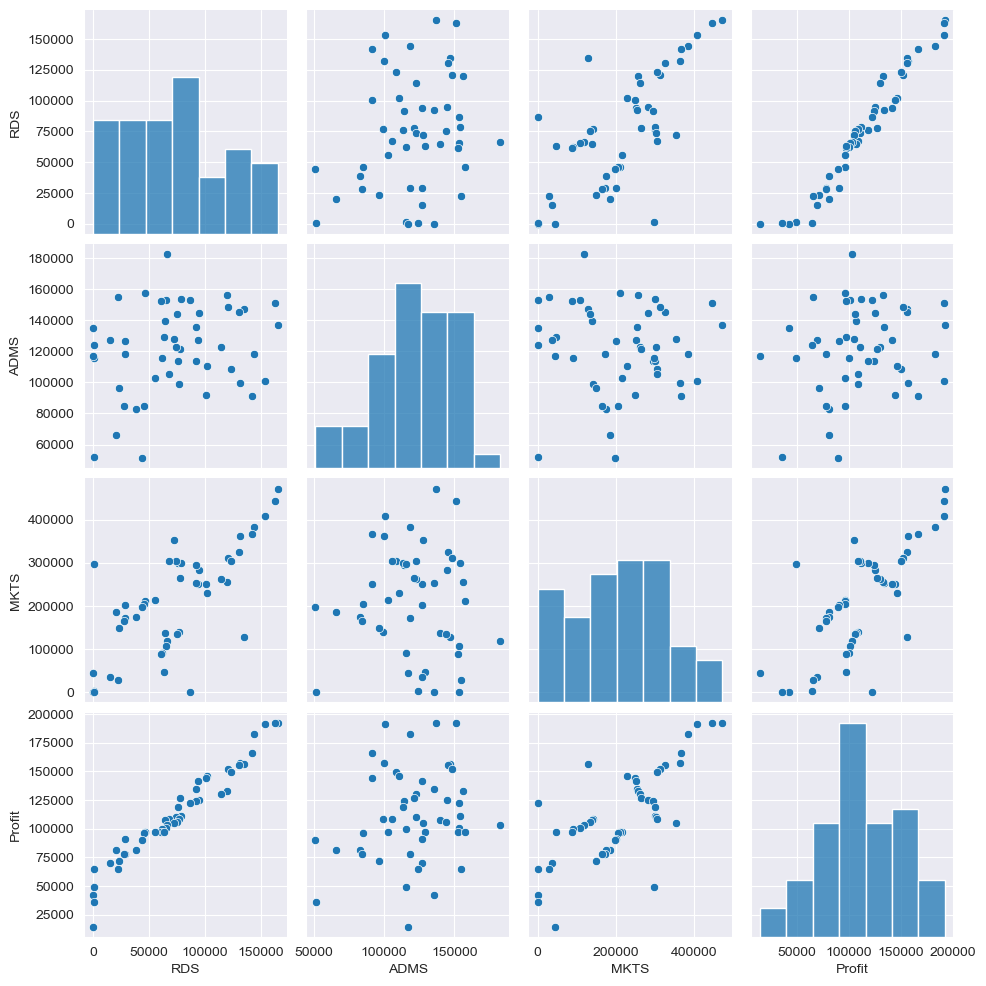

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style(style='darkgrid')
sns.pairplot(df1)

# checking outliers or influecing

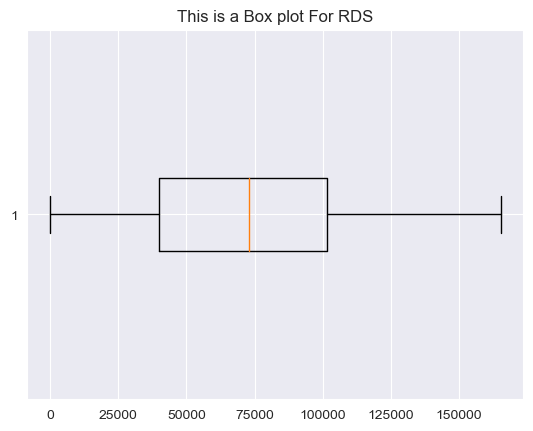

In [17]:
plt.boxplot(df1["RDS"],vert=False,widths=0.2)
plt.title("This is a Box plot For RDS")
plt.show()

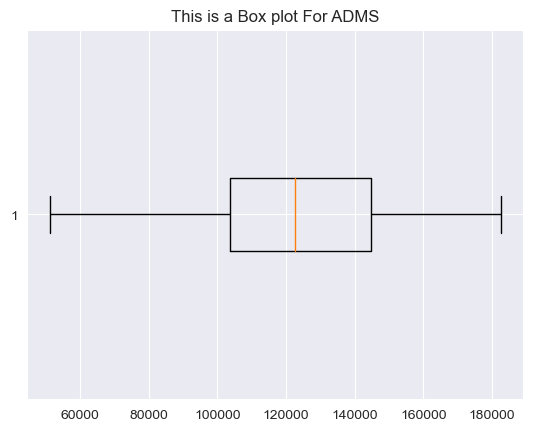

In [18]:
plt.boxplot(df1["ADMS"],vert=False,widths=0.2)
plt.title("This is a Box plot For ADMS")
plt.show()

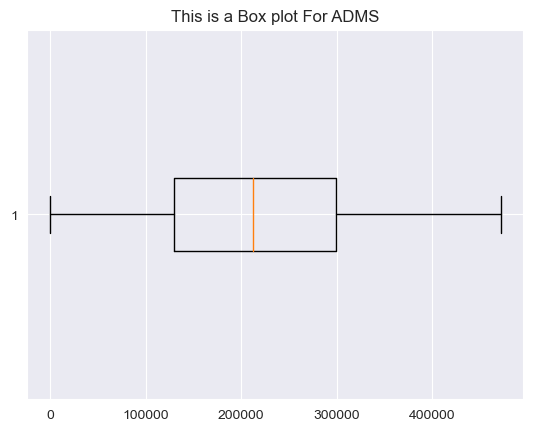

In [19]:
plt.boxplot(df1["MKTS"],vert=False,widths=0.2)
plt.title("This is a Box plot For ADMS")
plt.show()

# Transform x varaible into z distribution

In [20]:
df1

,RDS,ADMS,MKTS,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [21]:
df2=df1.drop(df.columns[[4,3]],axis=1)
df2

,RDS,ADMS,MKTS
0,165349.20,136897.80,471784.10
1,162597.70,151377.59,443898.53
2,153441.51,101145.55,407934.54
3,144372.41,118671.85,383199.62
4,142107.34,91391.77,366168.42
5,131876.90,99814.71,362861.36
6,134615.46,147198.87,127716.82
7,130298.13,145530.06,323876.68
8,120542.52,148718.95,311613.29
9,123334.88,108679.17,304981.62


In [22]:
# applying standard scaler 
from sklearn.preprocessing import StandardScaler
SS=StandardScaler()
df3=SS.fit_transform(df2)
df3

array([[ 2.01641149e+00,  5.60752915e-01,  2.15394309e+00],
       [ 1.95586034e+00,  1.08280658e+00,  1.92360040e+00],
       [ 1.75436374e+00, -7.28257028e-01,  1.62652767e+00],
       [ 1.55478369e+00, -9.63646307e-02,  1.42221024e+00],
       [ 1.50493720e+00, -1.07991935e+00,  1.28152771e+00],
       [ 1.27980001e+00, -7.76239071e-01,  1.25421046e+00],
       [ 1.34006641e+00,  9.32147208e-01, -6.88149930e-01],
       [ 1.24505666e+00,  8.71980011e-01,  9.32185978e-01],
       [ 1.03036886e+00,  9.86952101e-01,  8.30886909e-01],
       [ 1.09181921e+00, -4.56640246e-01,  7.76107440e-01],
       [ 6.20398248e-01, -3.87599089e-01,  1.49807267e-01],
       [ 5.93085418e-01, -1.06553960e+00,  3.19833623e-01],
       [ 4.43259872e-01,  2.15449064e-01,  3.20617441e-01],
       [ 4.02077603e-01,  5.10178953e-01,  3.43956788e-01],
       [ 1.01718075e+00,  1.26919939e+00,  3.75742273e-01],
       [ 8.97913123e-01,  4.58678535e-02,  4.19218702e-01],
       [ 9.44411957e-02,  9.11841968e-03

In [23]:
df3=pd.DataFrame(df3)

In [24]:
df3

,0,1,2
0,2.016411,0.560753,2.153943
1,1.955860,1.082807,1.923600
2,1.754364,-0.728257,1.626528
3,1.554784,-0.096365,1.422210
4,1.504937,-1.079919,1.281528
5,1.279800,-0.776239,1.254210
6,1.340066,0.932147,-0.688150
7,1.245057,0.871980,0.932186
8,1.030369,0.986952,0.830887
9,1.091819,-0.456640,0.776107


In [25]:
df3.columns=["RDS","ADMS","MKTS"]

In [26]:
df3.head()

,RDS,ADMS,MKTS
0,2.016411,0.560753,2.153943
1,1.955860,1.082807,1.923600
2,1.754364,-0.728257,1.626528
3,1.554784,-0.096365,1.422210
4,1.504937,-1.079919,1.281528


In [27]:
df1["State"].value_counts()

New York      17
California    17
Florida       16
Name: State, dtype: int64

In [28]:
from sklearn.preprocessing import LabelEncoder
LE= LabelEncoder()
ST=LE.fit_transform(df1["State"])

In [29]:
ST

array([2, 0, 1, 2, 1, 2, 0, 1, 2, 0, 1, 0, 1, 0, 1, 2, 0, 2, 1, 2, 0, 2,
       1, 1, 2, 0, 1, 2, 1, 2, 1, 2, 0, 1, 0, 2, 1, 0, 2, 0, 0, 1, 0, 2,
       0, 2, 1, 0, 2, 0])

In [30]:
df4=pd.DataFrame(ST)

In [31]:
df4.head()

,0
0,2
1,0
2,1
3,2
4,1


In [32]:
df4.columns=["State"]

In [33]:
df4.head()

,State
0,2
1,0
2,1
3,2
4,1


In [34]:
df5=pd.concat([df3,df4],axis=1)
df5.head()

,RDS,ADMS,MKTS,State
0,2.016411,0.560753,2.153943,2
1,1.955860,1.082807,1.923600,0
2,1.754364,-0.728257,1.626528,1
3,1.554784,-0.096365,1.422210,2
4,1.504937,-1.079919,1.281528,1


# model testing

In [35]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()

In [36]:
Y=df1["Profit"]
X=df5

In [37]:
train_error=[]
test_error=[]
train_R2=[]
test_R2=[]

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
for i in range(1,101):
    X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size=0.3, random_state=(i))
    LR.fit(X_train,Y_train)
    Y_pred_train =LR.predict(X_train)
    Y_pred_test = LR.predict(X_test)
    from sklearn.metrics import mean_squared_error as Mse 
    train_error.append(np.sqrt(Mse(Y_train,Y_pred_train)))
    test_error.append(np.sqrt(Mse(Y_test,Y_pred_test)))
    train_R2.append(r2_score(Y_train,Y_pred_train))
    test_R2.append(r2_score(Y_train,Y_pred_train))

In [39]:
print(train_error)

[9073.92257859399, 9146.7563292543, 8697.497489267696, 9008.582946633986, 9938.737488233231, 7061.139805990529, 9075.96528770622, 6478.441533089676, 8441.641149414381, 10008.087084556913, 8253.898367701695, 9066.189224482945, 8636.480920153599, 9306.345018785221, 8567.802469328532, 9055.817182514886, 9186.314201390522, 7132.841770956462, 8776.062343338614, 8975.971771344955, 9413.986068912394, 7584.796345106677, 9348.72005168136, 9760.62811980435, 8380.022363443117, 7187.214831082396, 8851.860780503588, 8778.546346298774, 8592.662837586218, 9836.677596167143, 9674.575161584426, 6892.584743916557, 8899.881377861328, 9438.17556211949, 9639.637498525772, 8868.689038324672, 8065.045625487113, 9599.304297316714, 9374.627182744769, 7199.167030535791, 6596.663203945964, 9044.25020712478, 8755.247414706022, 9158.925469794023, 9950.248722754439, 6707.551877224638, 9912.712782118355, 8924.070174727603, 9319.191051509364, 9024.895720951155, 8942.874045985574, 10102.432552613222, 9865.629010245253

In [40]:
print(test_error)

[8596.084988566672, 9004.38659174416, 10717.01869751695, 9377.074633990303, 6177.736650766241, 12832.496719478051, 8888.897289271286, 13139.186677409867, 10555.206425818853, 5944.248572700339, 11054.357911867863, 8607.228659069448, 10384.855307404416, 8117.934540957379, 11237.487280184398, 8940.225800221775, 8391.529628978873, 12252.457973330227, 9715.590383968898, 9351.197938846159, 7927.992222244455, 12366.181182736405, 7671.314384375084, 6771.361662259109, 10060.402105021076, 12745.996055945194, 9970.757388299928, 9474.952892040948, 10097.087232244307, 6494.4476898054245, 6761.319839372901, 12611.617852030977, 10483.746549920526, 9054.575793544782, 7151.05310244888, 9569.679878423702, 10807.548245317032, 7369.34342622285, 7682.761341874603, 12469.799326475659, 13328.153841764153, 9157.839682169528, 9916.53003481152, 9016.543180324663, 5638.64292858372, 13990.6322956894, 6213.535748617464, 9145.607561580018, 8261.794187213669, 9668.699826627339, 9641.03174209067, 4940.048141615229, 5

In [41]:
print(train_R2)

[0.9460584862051975, 0.9428754697916201, 0.953104776744943, 0.9544872665483073, 0.9326246651068697, 0.960934123988361, 0.9551179565245412, 0.9689974193729789, 0.9579318994942749, 0.9321308298801432, 0.9581685172453913, 0.9532666830680178, 0.956466730925859, 0.9428417309323208, 0.9601713331799726, 0.9565173226226037, 0.953914473708116, 0.9665896721595822, 0.9566758322064483, 0.9453535448842525, 0.9487248435938792, 0.9598693825318296, 0.9542949996103613, 0.9490218431891037, 0.9535569502059986, 0.9526426895990446, 0.9534335401100865, 0.959746007008849, 0.9520652033736317, 0.9527433916748146, 0.938473734065457, 0.9683267545723762, 0.9502199514790061, 0.926022256010305, 0.9541692462061065, 0.9556549950802776, 0.9505489289464777, 0.9478253643724034, 0.9400259976751449, 0.961504865898871, 0.9732234670557706, 0.9510015268301873, 0.9572907324350021, 0.9540271070802033, 0.9320261912505038, 0.9616674920008037, 0.9525267843795083, 0.9451599450280533, 0.9479173308532289, 0.955387282055379, 0.942580

In [42]:
print(test_R2)

[0.9460584862051975, 0.9428754697916201, 0.953104776744943, 0.9544872665483073, 0.9326246651068697, 0.960934123988361, 0.9551179565245412, 0.9689974193729789, 0.9579318994942749, 0.9321308298801432, 0.9581685172453913, 0.9532666830680178, 0.956466730925859, 0.9428417309323208, 0.9601713331799726, 0.9565173226226037, 0.953914473708116, 0.9665896721595822, 0.9566758322064483, 0.9453535448842525, 0.9487248435938792, 0.9598693825318296, 0.9542949996103613, 0.9490218431891037, 0.9535569502059986, 0.9526426895990446, 0.9534335401100865, 0.959746007008849, 0.9520652033736317, 0.9527433916748146, 0.938473734065457, 0.9683267545723762, 0.9502199514790061, 0.926022256010305, 0.9541692462061065, 0.9556549950802776, 0.9505489289464777, 0.9478253643724034, 0.9400259976751449, 0.961504865898871, 0.9732234670557706, 0.9510015268301873, 0.9572907324350021, 0.9540271070802033, 0.9320261912505038, 0.9616674920008037, 0.9525267843795083, 0.9451599450280533, 0.9479173308532289, 0.955387282055379, 0.942580

In [43]:
print('Training Error - CV: ',np.mean(train_error).round(2))

Training Error - CV:  8698.47


In [44]:
print('Test Error - CV: ',np.mean(test_error).round(2))

Test Error - CV:  9545.0


In [45]:
print('Training R square Value Will be - CV: ',np.mean(train_R2).round(2))

Training R square Value Will be - CV:  0.95


In [46]:
print('Test R square Value Will be - CV: ',np.mean(test_R2).round(2))

Test R square Value Will be - CV:  0.95


# model building

In [47]:
df1.corr()

,RDS,ADMS,MKTS,Profit
RDS,1.000000,0.241955,0.724248,0.972900
ADMS,0.241955,1.000000,-0.032154,0.200717
MKTS,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


In [48]:
# Here Corelation between RDS With Profit Is high So We will Put First Priority

In [49]:
x=df1[["RDS"]]
y=df1["Profit"]

In [50]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.fit(x,y)

LinearRegression()

In [51]:
print(LR.intercept_)
LR.coef_
Y_pred1 = LR.predict(x)
Y_pred1

49032.899141252135


array([190289.29389289, 187938.71118575, 180116.65707807, 172369.00320589,
       170433.97345032, 161694.19683741, 164033.72501421, 160345.46724972,
       152011.33380847, 154396.82286103, 136096.36397105, 135036.08586475,
       129219.89081021, 127621.20411029, 151499.37407569, 146869.43093301,
       115678.82583435, 129897.69412683, 127413.41482014, 122860.50313037,
       114175.91374003, 116000.34693472, 112245.81324567, 106725.35677792,
       114850.93206678, 104275.40289851, 113385.70276482, 110633.79960036,
       105460.14271464, 105079.09459155, 101994.24845109, 101261.18102569,
       103202.54108032,  96440.90176556,  88694.29012885,  88342.27936946,
        73520.10196791,  86681.47714396,  66314.86331588,  81973.10151051,
        73597.47513738,  72861.58000754,  69229.14164122,  62279.31048036,
        67979.15105018,  49887.38699921,  50156.68526807,  49032.89914125,
        49495.96777887,  49032.89914125])

In [52]:
from sklearn.metrics import mean_squared_error,r2_score
mse1=mean_squared_error(y,Y_pred1)
print("Mean Squared Error Will be : ",mse1.round(3))
print("Root Mean Squared Valued earror  Will Be : ",np.sqrt(mse1).round(3))
RS1=r2_score(y,Y_pred1).round(3)
print("R Square value will be :",RS1)

Mean Squared Error Will be :  85120931.327
Root Mean Squared Valued earror  Will Be :  9226.101
R Square value will be : 0.947


In [53]:
# Here Corelation between MKTS With Profit Is second high So We will Put second Priority.

In [54]:
x1=df1[["MKTS"]]
y1=df1["Profit"]

In [55]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.fit(x1,y1)
print(LR.intercept_)
LR.coef_
Y_pred2 = LR.predict(x1)

60003.54881577171


In [56]:
Y_pred2 

array([176279.11108087, 169406.4540099 , 160542.79548783, 154446.6452984 ,
       150249.14827371, 149434.09269861,  91480.54233084, 139825.957141  ,
       136803.53106194, 135169.09455167, 116482.38799338, 121555.40690911,
       121578.79342871, 122275.16161582, 123223.53440083, 124520.725912  ,
       125154.08432357, 129646.60541077, 132689.20910981,  60003.54881577,
       133612.17440925, 133876.58083734, 134759.39052882, 135116.62583886,
        94649.51308854,  94005.71466253,  93041.43046741, 147048.97084394,
        89122.26728384,  86408.79514491,  82463.68719457,  81745.74889263,
        71361.68563276, 112902.28621369, 111956.5875117 , 110655.27520162,
       109573.11693409, 108563.27474394, 105663.84908998, 103133.747573  ,
       102590.64254408, 100538.8790259 ,  96479.79352412,  68761.2742168 ,
        66986.90306536,  60472.79000314, 133230.16008476,  60003.54881577,
        60003.54881577,  71136.86795632])

In [57]:
from sklearn.metrics import mean_squared_error,r2_score
mse2=mean_squared_error(y1,Y_pred2)
print("Mean Squared Error Will be : ",mse2.round(3))
print("Root Mean Squared Valued earror  Will Be : ",np.sqrt(mse2).round(3))
RS2=r2_score(y1,Y_pred2).round(3)
print("R Square value will be :",RS2)

Mean Squared Error Will be :  701870011.197
Root Mean Squared Valued earror  Will Be :  26492.829
R Square value will be : 0.559


In [58]:
#Lets Take A Two Variable For Model Validation...here two variables Are (Avoid Multicollionarity) RDS and ADMS 
#Because Corelation between them is weak

In [59]:
x2=df1[["RDS","ADMS"]]
y2=df1["Profit"]

In [60]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.fit(x2,y2)
print(LR.intercept_)
LR.coef_
Y_pred3 = LR.predict(x2)

54886.62062756297


In [61]:
Y_pred3

array([190182.18051422, 187042.70017375, 181811.05282189, 173063.60483212,
       172556.56688596, 163290.3432988 , 163140.16108385, 159506.55258176,
       150927.06921427, 155456.33840451, 136886.7364369 , 136813.24417597,
       129060.84843265, 127014.29410672, 149995.54600387, 147121.35128969,
       115699.01057768, 128803.81097417, 127934.42560223, 121255.05106635,
       114591.99746274, 114318.30264267, 112171.7361924 , 107503.30731406,
       116046.1892326 , 103239.54965695, 112190.44518513, 110275.64186736,
       102151.44314038, 103336.28425993, 102204.71677724,  99500.88871756,
       102704.48973985,  97267.37638538,  86554.31281262,  90049.00868293,
        72864.7647093 ,  90162.344647  ,  68831.97481587,  83730.93359407,
        73393.84633921,  74444.3245688 ,  70170.28040536,  61503.70921445,
        65802.43073808,  49169.39291692,  49882.9722735 ,  47709.61251236,
        52611.78109569,  48687.0136222 ])

In [62]:
from sklearn.metrics import mean_squared_error,r2_score
mse3=mean_squared_error(y2,Y_pred3)
print("Mean Squared Error Will be : ",mse3.round(3))
print("Root Mean Squared Valued earror  Will Be : ",np.sqrt(mse3).round(3))
RS3=r2_score(y2,Y_pred3).round(3)
print("R Square value will be :",RS3)

Mean Squared Error Will be :  83086833.258
Root Mean Squared Valued earror  Will Be :  9115.198
R Square value will be : 0.948


In [63]:
#Lets Take A Two Variable For Model Validation...here two variables Are (Avoid Multicollionarity) MKTS and ADMS 
#Because Corelation between them is weak....

In [64]:
x3=df1[["MKTS","ADMS"]]
y3=df1["Profit"]

In [65]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.fit(x3,y3)
print(LR.intercept_)
LR.coef_
Y_pred4 = LR.predict(x3)

20224.429058757727


In [66]:
Y_pred4

array([181935.0018073 , 179682.56695457, 154474.41472181, 153992.07136044,
       140924.14739476, 142827.48227294,  99650.20993205, 147923.20255137,
       145903.69216967, 131293.65876203, 113045.97825846, 112081.89709553,
       123605.52695426, 126954.55637381, 134726.17561492, 125053.51411479,
       125363.08370116, 137498.91349396, 130568.88715287,  69912.75767327,
       131400.93204408, 144584.42191851, 135444.93500192, 130292.92341094,
        87340.24246377,  99725.10477405, 100234.82523181, 149498.25298355,
       108742.24569865,  96417.43968977,  80331.78887115,  91602.42268084,
        73517.31399862, 106991.84191589, 123721.31546743,  98893.73004544,
       111398.19484665,  85852.90755188,  87672.02328227,  90630.93665807,
       101593.66071797,  88570.49015393,  88187.52809728,  70297.05733893,
        77381.86844707,  60883.16140399, 131646.03084495,  64058.4277981 ,
        36972.27484798,  69329.92345455])

In [67]:
from sklearn.metrics import mean_squared_error,r2_score
mse4=mean_squared_error(y3,Y_pred4)
print("Mean Squared Error Will be : ",mse4.round(3))
print("Root Mean Squared Valued earror  Will Be : ",np.sqrt(mse3).round(4))
RS4=r2_score(y2,Y_pred4).round(3)
print("R Square value will be :",RS4)

Mean Squared Error Will be :  621358650.9
Root Mean Squared Valued earror  Will Be :  9115.1979
R Square value will be : 0.61


MODEL VALIDATION
1. Collinearity Check
1) Collinearity Problem Check
Calculate VIF = 1/(1-Rsquare) for all independent variables

In [68]:
X=df5[["MKTS"]]
Y=df5["ADMS"]

In [79]:
# step 4 : Model fitting 1
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.fit(X,Y)
Y_pred = LR.predict(X)

# step 5 : Metrics
from sklearn.metrics import r2_score
r2 = r2_score(Y,Y_pred)
VIF = 1 / (1-r2)
VIF

1.0010349416824806

In [80]:
X=df5[["ADMS"]]#Opposite.....
Y=df5["MKTS"]

In [81]:
# step 4 : Model fitting 2
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.fit(X,Y)
Y_pred = LR.predict(X)

# step 5 : Metrics
from sklearn.metrics import r2_score
r2 = r2_score(Y,Y_pred)
VIF = 1 / (1-r2)
VIF

1.0010349416824806

In [82]:
X1=df5[["ADMS"]]
Y1=df5["RDS"]

In [83]:
# step 4 : Model fitting 3
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.fit(X1,Y1)
Y_pred1 = LR.predict(X1)

# step 5 : Metrics
from sklearn.metrics import r2_score
r2 = r2_score(Y1,Y_pred1)
VIF = 1 / (1-r2)
VIF

1.0621826590281838

In [84]:
X1=df5[["RDS"]]
Y1=df5["ADMS"]

In [85]:
# step 4 : Model fitting 4
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.fit(X1,Y1)
Y_pred1 = LR.predict(X1)

# step 5 : Metrics
from sklearn.metrics import r2_score
r2 = r2_score(Y1,Y_pred1)
VIF = 1 / (1-r2)
VIF

1.0621826590281833

In [87]:
 # model fitting 3 is best model 